In [35]:
import re
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
with open('C:\python\lichess_base\lichess_shahmatpatblog_2021-01-07.pgn', 'r', encoding='utf-8') as f:
    text_file = f.read()
    col_names = re.findall(r'(?<=\[)[A-Za-z]+', text_file[:500])
    #print (col_names)
    col_names.remove('Site')
    col_names.remove('WhiteRatingDiff')
    col_names.remove('BlackRatingDiff')
    col_names.remove('Variant')
    col_names.remove('Termination')
    print (col_names)
    data_dict = {} #создаю словарь признаков
    for col_name in col_names:
        pattern = r'(?<=\[' + col_name +  r' \")[^\"]+'
        data_dict[col_name] = re.findall(pattern, text_file)
        print(col_name, len(data_dict[col_name])) #проверка на одинаковое количество элементов у признака
    #print(data_dict)

['Event', 'Date', 'White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'WhiteElo', 'BlackElo', 'TimeControl', 'ECO']
Event 1037
Date 1037
White 1037
Black 1037
Result 1037
UTCDate 1037
UTCTime 1037
WhiteElo 1037
BlackElo 1037
TimeControl 1037
ECO 1037


In [36]:
print (text_file[:500])

﻿[Event "Rated Blitz game"]
[Site "https://lichess.org/fThUdkkU"]
[Date "2021.01.06"]
[White "YA_2009"]
[Black "shahmatpatblog"]
[Result "1-0"]
[UTCDate "2021.01.06"]
[UTCTime "17:50:54"]
[WhiteElo "2241"]
[BlackElo "2239"]
[WhiteRatingDiff "+5"]
[BlackRatingDiff "-5"]
[Variant "Standard"]
[TimeControl "180+2"]
[ECO "C45"]
[Termination "Normal"]

1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Nf6 5. Nxc6 bxc6 6. Bd3 d5 7. Qe2 Be7 8. e5 Ng8 9. O-O Bc5 10. Kh1 Ne7 11. c3 O-O 12. Be3 Bxe3 13. Qxe3 f5 14. f


In [37]:
df = pd.DataFrame(data=data_dict)
df = df.drop(['Date', 'UTCDate'], axis=1) #удаляю столбцы с датами
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO
0,Rated Blitz game,YA_2009,shahmatpatblog,1-0,17:50:54,2241,2239,180+2,C45
1,Rated Blitz game,shahmatpatblog,YA_2009,1/2-1/2,17:40:56,2239,2241,180+2,D11
2,Rated Blitz game,YA_2009,shahmatpatblog,1-0,17:38:52,2235,2245,180+2,C45
3,Rated Blitz game,shahmatpatblog,YA_2009,0-1,17:32:01,2251,2229,180+2,B21
4,Rated Blitz game,kowshikds,shahmatpatblog,1-0,12:37:40,2212,2258,180+2,D02
...,...,...,...,...,...,...,...,...,...
1032,Rated Blitz game,Norvz26,shahmatpatblog,1-0,04:53:37,1963,2026,180+2,C46
1033,Rated Blitz game,Cedoda,shahmatpatblog,1-0,04:51:19,2075,2052,180+2,C42
1034,Rated Blitz game,shahmatpatblog,johann26,1-0,04:41:16,2023,1994,180+2,D02
1035,Rated Blitz game,shahmatpatblog,fishcrusher,1-0,17:33:48,1988,2005,180+2,A45


In [38]:
#преобработка столбца Events. Разделяю на обычные игры (0) и турнирные игры (1)
df.loc[df['Event'] == 'Rated Blitz game', 'Event'] = 0
df.loc[df['Event'] == 'Rated Bullet game', 'Event'] = 0
df.loc[df['Event'] == 'Casual Blitz game', 'Event'] = 0
df.loc[df['Event'] != 0, 'Event'] = 1
print ('0 - обычные игры 1 - турнирные игры')
df['Event'].value_counts()

0 - обычные игры 1 - турнирные игры


0    920
1    117
Name: Event, dtype: int64

In [39]:
#преобразую время из str в количество секунд с начала суток
for i in df['UTCTime']:
    time_obj = datetime.datetime.strptime(i, '%H:%M:%S')
    df = df.replace (i, time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second)
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO
0,0,YA_2009,shahmatpatblog,1-0,64254,2241,2239,180+2,C45
1,0,shahmatpatblog,YA_2009,1/2-1/2,63656,2239,2241,180+2,D11
2,0,YA_2009,shahmatpatblog,1-0,63532,2235,2245,180+2,C45
3,0,shahmatpatblog,YA_2009,0-1,63121,2251,2229,180+2,B21
4,0,kowshikds,shahmatpatblog,1-0,45460,2212,2258,180+2,D02
...,...,...,...,...,...,...,...,...,...
1032,0,Norvz26,shahmatpatblog,1-0,17617,1963,2026,180+2,C46
1033,0,Cedoda,shahmatpatblog,1-0,17479,2075,2052,180+2,C42
1034,0,shahmatpatblog,johann26,1-0,16876,2023,1994,180+2,D02
1035,0,shahmatpatblog,fishcrusher,1-0,63228,1988,2005,180+2,A45


In [40]:
#создаю новый столбец - разницу моего рейтинга с рейтингом соперника
df['WhiteElo'] = df['WhiteElo'].astype('int64')
df['BlackElo'] = df['BlackElo'].astype('int64')
df['DiffElo'] = df['WhiteElo'] - df['BlackElo']
df['DiffElo'] = df['DiffElo'].where(df['White'] == 'shahmatpatblog', -df['DiffElo'])
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO,DiffElo
0,0,YA_2009,shahmatpatblog,1-0,64254,2241,2239,180+2,C45,-2
1,0,shahmatpatblog,YA_2009,1/2-1/2,63656,2239,2241,180+2,D11,-2
2,0,YA_2009,shahmatpatblog,1-0,63532,2235,2245,180+2,C45,10
3,0,shahmatpatblog,YA_2009,0-1,63121,2251,2229,180+2,B21,22
4,0,kowshikds,shahmatpatblog,1-0,45460,2212,2258,180+2,D02,46
...,...,...,...,...,...,...,...,...,...,...
1032,0,Norvz26,shahmatpatblog,1-0,17617,1963,2026,180+2,C46,63
1033,0,Cedoda,shahmatpatblog,1-0,17479,2075,2052,180+2,C42,-23
1034,0,shahmatpatblog,johann26,1-0,16876,2023,1994,180+2,D02,29
1035,0,shahmatpatblog,fishcrusher,1-0,63228,1988,2005,180+2,A45,-17


In [41]:
#добавляю столбец myResult, мой результат. Привожу к виду: если я выиграл - 1, если ничья - 0.5, если проиграл - 0.
cnt = 0 #для заполнения столюца по индексам
df['myResult'] = 0.0 #создаю новый столбец
for content in df[['White', 'Result']].itertuples(): #заполняю значениями
    wh, res = content[1], content[2]
    if wh == 'shahmatpatblog' and res == '1-0':
        df.loc[cnt, 'myResult'] = 1.0
    elif wh != 'shahmatpatblog' and res == '0-1':
        df.loc[cnt, 'myResult'] = 1.0
    elif res == '1/2-1/2':
        df.loc[cnt, 'myResult'] = 0.5
    else:
        df.loc[cnt, 'myResult'] = 0.0
    cnt += 1
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO,DiffElo,myResult
0,0,YA_2009,shahmatpatblog,1-0,64254,2241,2239,180+2,C45,-2,0.0
1,0,shahmatpatblog,YA_2009,1/2-1/2,63656,2239,2241,180+2,D11,-2,0.5
2,0,YA_2009,shahmatpatblog,1-0,63532,2235,2245,180+2,C45,10,0.0
3,0,shahmatpatblog,YA_2009,0-1,63121,2251,2229,180+2,B21,22,0.0
4,0,kowshikds,shahmatpatblog,1-0,45460,2212,2258,180+2,D02,46,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1032,0,Norvz26,shahmatpatblog,1-0,17617,1963,2026,180+2,C46,63,0.0
1033,0,Cedoda,shahmatpatblog,1-0,17479,2075,2052,180+2,C42,-23,0.0
1034,0,shahmatpatblog,johann26,1-0,16876,2023,1994,180+2,D02,29,1.0
1035,0,shahmatpatblog,fishcrusher,1-0,63228,1988,2005,180+2,A45,-17,1.0


In [42]:
#преобразование столбца TimeControl. 0 - Пуля 60+0, 60+1, 120+0, 120+1.
# 1 - Блиц 180+0, 180+1, 180+2, 300+0, 300+2
df.loc[df['TimeControl'] == '60+0', 'TimeControl'] = 0
df.loc[df['TimeControl'] == '60+1', 'TimeControl'] = 0
df.loc[df['TimeControl'] == '120+0', 'TimeControl'] = 0
df.loc[df['TimeControl'] == '120+1', 'TimeControl'] = 0
df.loc[df['TimeControl'] != 0, 'TimeControl'] = 1
#df['TimeControl'] = df['TimeControl'].astype('int64')
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO,DiffElo,myResult
0,0,YA_2009,shahmatpatblog,1-0,64254,2241,2239,1,C45,-2,0.0
1,0,shahmatpatblog,YA_2009,1/2-1/2,63656,2239,2241,1,D11,-2,0.5
2,0,YA_2009,shahmatpatblog,1-0,63532,2235,2245,1,C45,10,0.0
3,0,shahmatpatblog,YA_2009,0-1,63121,2251,2229,1,B21,22,0.0
4,0,kowshikds,shahmatpatblog,1-0,45460,2212,2258,1,D02,46,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1032,0,Norvz26,shahmatpatblog,1-0,17617,1963,2026,1,C46,63,0.0
1033,0,Cedoda,shahmatpatblog,1-0,17479,2075,2052,1,C42,-23,0.0
1034,0,shahmatpatblog,johann26,1-0,16876,2023,1994,1,D02,29,1.0
1035,0,shahmatpatblog,fishcrusher,1-0,63228,1988,2005,1,A45,-17,1.0


In [43]:
'''#кодирование индексов дебютов в числа (столбец ECO)
#df.loc[df['ECO'] == 'A45', 'myResult'].value_counts()
#создание списка со всеми возможными индексами (? - неопределенный, A00 - E99)
all_index = ['?']
for l in ['A', 'B', 'C', 'D', 'E']:
    for n in range (100):
        all_index.append(l + '{:02}'.format(n))
le = LabelEncoder()
le.fit(all_index) #обучаю кодировщик надписей
df['ECO'] = le.transform (df['ECO']) #заменяю данные в таблице на числовые'''

"#кодирование индексов дебютов в числа (столбец ECO)\n#df.loc[df['ECO'] == 'A45', 'myResult'].value_counts()\n#создание списка со всеми возможными индексами (? - неопределенный, A00 - E99)\nall_index = ['?']\nfor l in ['A', 'B', 'C', 'D', 'E']:\n    for n in range (100):\n        all_index.append(l + '{:02}'.format(n))\nle = LabelEncoder()\nle.fit(all_index) #обучаю кодировщик надписей\ndf['ECO'] = le.transform (df['ECO']) #заменяю данные в таблице на числовые"

In [44]:
#столбец White преобразую к виду: 1 - я играл белыми, 0 - я играл черными
df.loc[df['White'] == 'shahmatpatblog', 'White'] = 1
df.loc[df['White'] != 1, 'White'] = 0
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO,DiffElo,myResult
0,0,0,shahmatpatblog,1-0,64254,2241,2239,1,C45,-2,0.0
1,0,1,YA_2009,1/2-1/2,63656,2239,2241,1,D11,-2,0.5
2,0,0,shahmatpatblog,1-0,63532,2235,2245,1,C45,10,0.0
3,0,1,YA_2009,0-1,63121,2251,2229,1,B21,22,0.0
4,0,0,shahmatpatblog,1-0,45460,2212,2258,1,D02,46,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1032,0,0,shahmatpatblog,1-0,17617,1963,2026,1,C46,63,0.0
1033,0,0,shahmatpatblog,1-0,17479,2075,2052,1,C42,-23,0.0
1034,0,1,johann26,1-0,16876,2023,1994,1,D02,29,1.0
1035,0,1,fishcrusher,1-0,63228,1988,2005,1,A45,-17,1.0


In [45]:
y = df['myResult']
X = df.drop(['Black', 'Result', 'WhiteElo', 'BlackElo', 'myResult'], axis=1)
X

,Event,White,UTCTime,TimeControl,ECO,DiffElo
0,0,0,64254,1,C45,-2
1,0,1,63656,1,D11,-2
2,0,0,63532,1,C45,10
3,0,1,63121,1,B21,22
4,0,0,45460,1,D02,46
...,...,...,...,...,...,...
1032,0,0,17617,1,C46,63
1033,0,0,17479,1,C42,-23
1034,0,1,16876,1,D02,29
1035,0,1,63228,1,A45,-17


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Event        1037 non-null   int64 
 1   White        1037 non-null   object
 2   UTCTime      1037 non-null   int64 
 3   TimeControl  1037 non-null   object
 4   ECO          1037 non-null   object
 5   DiffElo      1037 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 48.7+ KB


In [47]:
df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO,DiffElo,myResult
0,0,0,shahmatpatblog,1-0,64254,2241,2239,1,C45,-2,0.0
1,0,1,YA_2009,1/2-1/2,63656,2239,2241,1,D11,-2,0.5
2,0,0,shahmatpatblog,1-0,63532,2235,2245,1,C45,10,0.0
3,0,1,YA_2009,0-1,63121,2251,2229,1,B21,22,0.0
4,0,0,shahmatpatblog,1-0,45460,2212,2258,1,D02,46,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1032,0,0,shahmatpatblog,1-0,17617,1963,2026,1,C46,63,0.0
1033,0,0,shahmatpatblog,1-0,17479,2075,2052,1,C42,-23,0.0
1034,0,1,johann26,1-0,16876,2023,1994,1,D02,29,1.0
1035,0,1,fishcrusher,1-0,63228,1988,2005,1,A45,-17,1.0


In [48]:
df.myResult.value_counts()

1.0    534
0.0    417
0.5     86
Name: myResult, dtype: int64

In [49]:
simple_games_count = df.loc[df['Event'] == 0, 'Event'].count()
win_simple_games_count = df.query('Event == 0 & myResult == 1.0').myResult.count()
win_simple_games_count / simple_games_count #доля побед в простых играх

0.4880434782608696

In [50]:
tourn_games_count = df.loc[df['Event'] == 1, 'Event'].count()
win_tourn_games_count = df.query('Event == 1 & myResult == 1.0').myResult.count()
win_tourn_games_count / tourn_games_count #доля побед в турнирных играх

0.7264957264957265

In [51]:
simple_strong_games_count = df.query('Event == 0 & DiffElo < 0').myResult.count()
win_simple_strong_games_count = df.query('Event == 0 & myResult == 1.0 & DiffElo < 0').myResult.count()
win_simple_strong_games_count / simple_strong_games_count #доля побед над соперниками с более высоким рейтом в простых играх

0.4255874673629243

In [52]:
tourn_strong_games_count = df.query('Event == 1 & DiffElo < 0').myResult.count()
win_tourn_strong_games_count = df.query('Event == 1 & myResult == 1.0 & DiffElo < 0').myResult.count()
win_tourn_strong_games_count / tourn_strong_games_count #доля побед над соперниками с более высоким рейтом в турнирных играх

0.34615384615384615

In [53]:
bullet_games_count = df.loc[df['TimeControl'] == 0, 'TimeControl'].count()
win_bullet_games_count = df.query('TimeControl == 0 & myResult == 1.0').myResult.count()
win_bullet_games_count / bullet_games_count #доля побед в пулю

0.5637065637065637

In [54]:
blitz_games_count = df.loc[df['TimeControl'] == 1, 'TimeControl'].count()
win_blitz_games_count = df.query('TimeControl == 1 & myResult == 1.0').myResult.count()
win_blitz_games_count / blitz_games_count #доля побед в блиц

0.4987146529562982

In [55]:
result_for_beginnings = df.groupby('ECO', as_index=False).aggregate({'myResult': 'mean', 'Black': 'count', 'White': 'sum'}) \
    .sort_values(by=['myResult'], ascending=True) \
    .rename(columns={'myResult': 'mean_myResult', 'Black': 'number_of_games', 'White': 'white_games'})
result_for_beginnings['black_games'] = result_for_beginnings ['number_of_games'] - result_for_beginnings['white_games']
result_for_beginnings.query('number_of_games > 1').head(30)

,ECO,mean_myResult,number_of_games,white_games,black_games
43,C13,0.000000,2,2,0
41,C01,0.000000,2,2,0
53,C33,0.000000,3,0,3
78,D08,0.000000,2,2,0
18,A46,0.000000,2,0,2
10,A29,0.000000,3,0,3
7,A20,0.000000,5,0,5
101,D55,0.100000,10,1,9
37,B21,0.166667,6,6,0
75,D05,0.187500,8,0,8


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df

,Event,White,Black,Result,UTCTime,WhiteElo,BlackElo,TimeControl,ECO,DiffElo,myResult
0,0,0,shahmatpatblog,1-0,64254,2241,2239,1,C45,-2,0.0
1,0,1,YA_2009,1/2-1/2,63656,2239,2241,1,D11,-2,0.5
2,0,0,shahmatpatblog,1-0,63532,2235,2245,1,C45,10,0.0
3,0,1,YA_2009,0-1,63121,2251,2229,1,B21,22,0.0
4,0,0,shahmatpatblog,1-0,45460,2212,2258,1,D02,46,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1032,0,0,shahmatpatblog,1-0,17617,1963,2026,1,C46,63,0.0
1033,0,0,shahmatpatblog,1-0,17479,2075,2052,1,C42,-23,0.0
1034,0,1,johann26,1-0,16876,2023,1994,1,D02,29,1.0
1035,0,1,fishcrusher,1-0,63228,1988,2005,1,A45,-17,1.0


In [57]:
beginning_stats = df.pivot_table(index='ECO',
                       columns='White',
                       values='myResult',
                       aggfunc='sum',
                       fill_value=0).reset_index() \
                        .rename_axis('', axis=1).rename(columns={0: 'my_result_black', 1: 'my_result_white'})

In [58]:
beginning_stats

,ECO,my_result_black,my_result_white
0,?,2.0,0.0
1,A00,7.5,1.0
2,A01,2.0,0.0
3,A03,1.0,0.0
4,A05,8.0,0.0
...,...,...,...
129,E53,1.0,0.5
130,E59,1.0,0.0
131,E61,0.0,1.0
132,E70,0.0,1.0


In [59]:
beginning_stats = beginning_stats.merge(result_for_beginnings, on='ECO', how='inner')
beginning_stats

,ECO,my_result_black,my_result_white,mean_myResult,number_of_games,white_games,black_games
0,?,2.0,0.0,1.000000,2,0,2
1,A00,7.5,1.0,0.531250,16,1,15
2,A01,2.0,0.0,0.333333,6,0,6
3,A03,1.0,0.0,1.000000,1,0,1
4,A05,8.0,0.0,0.571429,14,0,14
...,...,...,...,...,...,...,...
129,E53,1.0,0.5,0.500000,3,1,2
130,E59,1.0,0.0,0.500000,2,0,2
131,E61,0.0,1.0,1.000000,1,1,0
132,E70,0.0,1.0,1.000000,1,1,0


In [60]:
white_beginning_stats = beginning_stats[beginning_stats['white_games'] > 1]
white_beginning_stats = white_beginning_stats.drop(['my_result_black', 'mean_myResult', 'number_of_games', 'black_games'],
                                                   axis=1)
white_beginning_stats['mean_result'] = white_beginning_stats['my_result_white'] / white_beginning_stats['white_games']
white_beginning_stats = white_beginning_stats.sort_values(by='mean_result', ascending=True)
white_beginning_stats

,ECO,my_result_white,white_games,mean_result
43,C13,0.0,2,0.000000
41,C01,0.0,2,0.000000
78,D08,0.0,2,0.000000
37,B21,1.0,6,0.166667
77,D07,1.0,4,0.250000
16,A44,0.5,2,0.250000
33,B10,0.5,2,0.250000
28,B00,3.5,8,0.437500
122,E41,1.0,2,0.500000
40,C00,1.0,2,0.500000


<AxesSubplot:title={'center':'My worst white beginnings'}, xlabel='mean_result', ylabel='ECO'>

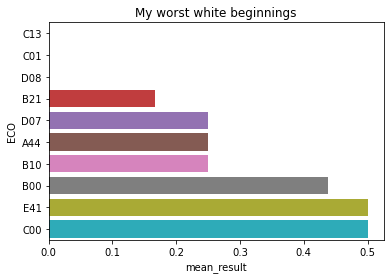

In [61]:
white_plot = sns.barplot(x=white_beginning_stats['mean_result'].head(10), 
                         y=white_beginning_stats['ECO'].head(10), orient='h')
white_plot.set_title('My worst white beginnings')
white_plot

In [62]:
black_beginning_stats = beginning_stats[beginning_stats['black_games'] > 1]
black_beginning_stats = black_beginning_stats.drop(['my_result_white', 'mean_myResult', 'number_of_games', 'white_games'],
                                                   axis=1)
black_beginning_stats['mean_result'] = black_beginning_stats['my_result_black'] / black_beginning_stats['black_games']
black_beginning_stats = black_beginning_stats.sort_values(by='mean_result', ascending=True)
black_beginning_stats

,ECO,my_result_black,black_games,mean_result
53,C33,0.0,3,0.000000
7,A20,0.0,5,0.000000
10,A29,0.0,3,0.000000
18,A46,0.0,2,0.000000
101,D55,1.0,9,0.111111
75,D05,1.5,8,0.187500
46,C21,2.0,8,0.250000
48,C23,0.5,2,0.250000
107,E00,1.0,4,0.250000
59,C47,0.5,2,0.250000


<AxesSubplot:title={'center':'My worst black beginnings'}, xlabel='mean_result', ylabel='ECO'>

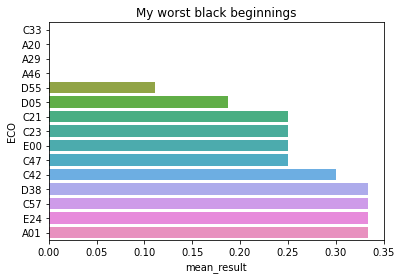

In [63]:
black_plot = sns.barplot(x=black_beginning_stats['mean_result'].head(15), 
                         y=black_beginning_stats['ECO'].head(15), orient='h')
black_plot.set_title('My worst black beginnings')
black_plot

In [64]:
X

,Event,White,UTCTime,TimeControl,ECO,DiffElo
0,0,0,64254,1,C45,-2
1,0,1,63656,1,D11,-2
2,0,0,63532,1,C45,10
3,0,1,63121,1,B21,22
4,0,0,45460,1,D02,46
...,...,...,...,...,...,...
1032,0,0,17617,1,C46,63
1033,0,0,17479,1,C42,-23
1034,0,1,16876,1,D02,29
1035,0,1,63228,1,A45,-17


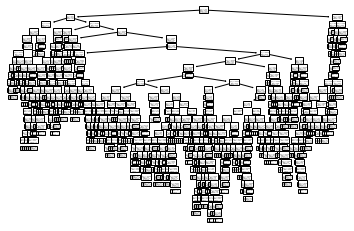

In [66]:
from sklearn import tree
# clf = tree.DecisionTreeRegressor()
# #X = X.drop(['ECO'], axis=1)
# tree.plot_tree(clf.fit(X, y));